___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# K Means Color Quantization

### Imports


In [3]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [6]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [8]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

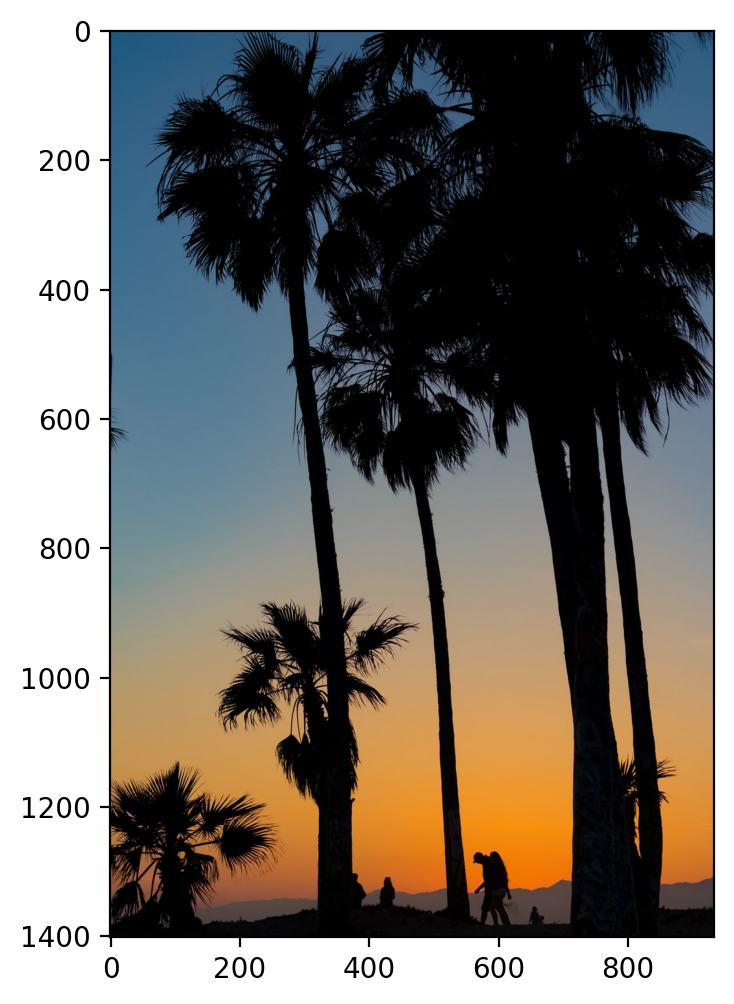

In [12]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [42]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [43]:
(h,w,c) = image_as_array.shape

In [44]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [45]:
from sklearn.cluster import KMeans

In [46]:
model = KMeans(n_clusters=6)

In [47]:
model

KMeans(n_clusters=6)

In [62]:
labels = model.fit_predict(image_as_array2d)

In [63]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [73]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[  2.78511649,   2.58768262,   3.70018933],
       [138.48117295, 144.26702702, 143.36832053],
       [193.42381114, 154.48097123, 107.32286981],
       [ 71.66897867, 109.55660624, 137.71325107],
       [219.38959087, 134.67545907,  45.42786667],
       [ 67.69383456,  61.88876822,  62.08150368]])

In [74]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [75]:
rgb_codes

array([[  3,   3,   4],
       [138, 144, 143],
       [193, 154, 107],
       [ 72, 110, 138],
       [219, 135,  45],
       [ 68,  62,  62]])

In [76]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [77]:
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

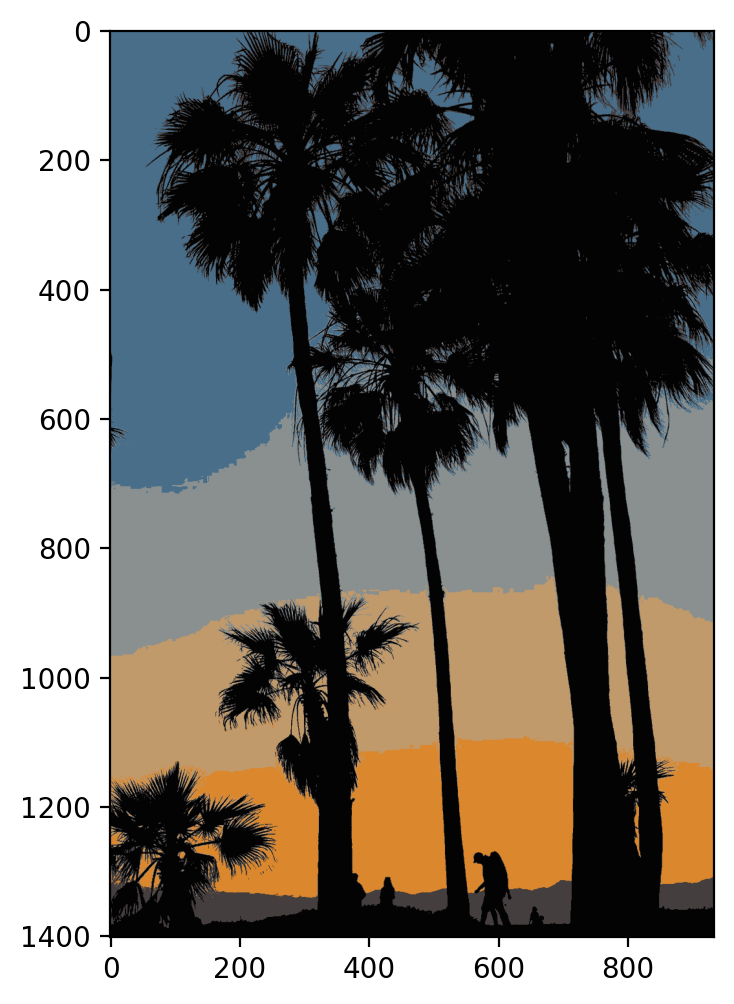

In [79]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)